# 多元線性迴歸  

本章重點：
* 檢視係數的重要性
* 標準化係數
* 用管道器結合資料轉化器和預測器
* 水平合併器
* 實作管道器

多元線性迴歸和簡單線性迴歸的差異就在於自變數可以擁有多個變數。方程式如下所示。線性迴歸的功能就是要預測$\beta_0$...$\beta_n$係數。

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

## 1 載入資料
資料仍沿續上一章的波士頓房價。因為資料跟上一章相同，所以我們就不再進行資料探索的動作。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
boston = pd.read_csv("boston.csv") 
df = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']
df.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27


## 3 迴歸模型建構三步驟：
* 初始物件
* 機器學習
* 模型預測  

你會發現指令都沒有修改。所以用sklearn來學習是很容易上手的。  
範例： 初始迴歸物件  

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('常數項',model.intercept_)
print('廻歸係數',model.coef_)

常數項 33.334975755635966
廻歸係數 [-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [ ]:
pd.DataFrame(zip(X.columns, model.coef_), columns=['變數','係數']).\
sort_values(by='係數', ascending=False)

,變數,係數
5,RM,3.902051
3,CHAS,3.238668
8,RAD,0.234854
2,INDUS,0.058211
1,ZN,0.037823
11,B,0.011770
9,TAX,-0.008213
6,AGE,-0.012851
0,CRIM,-0.128750
12,LSTAT,-0.547566


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(), LinearRegression())
model_pl.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
reg = model_pl.named_steps['linearregression']
pd.DataFrame(zip(X.columns, reg.coef_), columns=['變數','係數']).\
sort_values(by='係數', ascending=False)

,變數,係數
5,RM,2.808135
8,RAD,2.032761
11,B,1.041257
1,ZN,0.867933
3,CHAS,0.861838
2,INDUS,0.405028
6,AGE,-0.358669
0,CRIM,-0.988580
9,TAX,-1.364009
4,NOX,-1.900100


In [ ]:
model_pl.named_steps.keys()

dict_keys(['standardscaler', 'linearregression'])

## 5 預測結果的好壞評估

範例： 進行訓練集資料的預測  
跟上一章的簡單迴歸相比，所有評估績效都有所提升

In [ ]:
y_pred = model_pl.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 20.724023437339746
Mean Absolute Error: 3.148255754816832
R2 Score: 0.7261570836552478


In [ ]:
y_train.iloc[0]

14.6

In [ ]:
model_pl.predict(X_train.iloc[[0]])

array([18.94993353])

In [ ]:
from sklearn.compose import ColumnTransformer
data_pl = ColumnTransformer([
    ('column_sel',StandardScaler(),X.columns[:3])
])
model_pl = make_pipeline(data_pl, LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)

print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 49.17549394985067
Mean Absolute Error: 5.158028841813333
R2 Score: 0.35020529596305805


In [ ]:
data_pl = ColumnTransformer([
    ('column_sel','passthrough',['LSTAT'])
])
model_pl = make_pipeline(data_pl, LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 38.410075117662345
Mean Absolute Error: 4.744269760624963
R2 Score: 0.49245729145962347


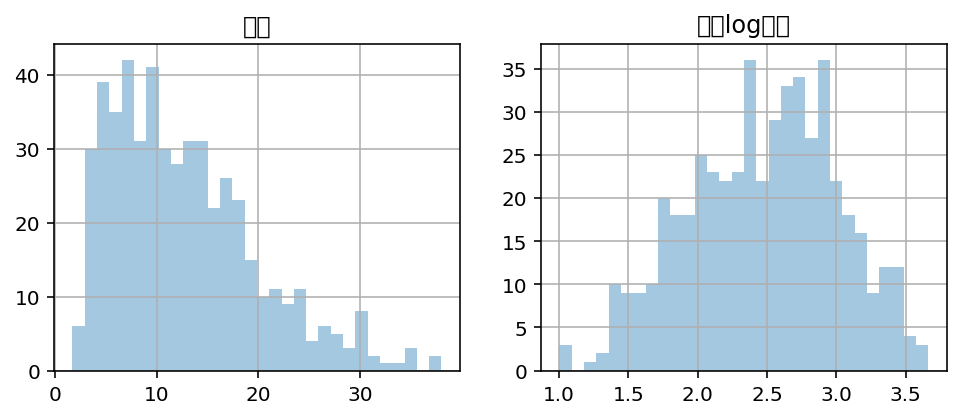

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
df['LSTAT'].hist(alpha=0.4, bins=30, ax=axes[0])
axes[0].set_title('原始')
# 對'LSTAT'欄位進行log轉換
np.log1p(df['LSTAT']).hist(alpha=0.4, bins=30, ax=axes[1])
axes[1].set_title('進行log轉換');

In [ ]:
from sklearn.preprocessing import FunctionTransformer
data_pl = ColumnTransformer([
    ('column_sel','passthrough',['LSTAT'])
])
model_pl = make_pipeline(data_pl,
                         FunctionTransformer(np.log1p),
                         LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)

print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 30.77844851412701
Mean Absolute Error: 4.187905021877533
R2 Score: 0.5933000111122595


In [ ]:
# 用字典存放初始化的轉換器和預測器
pl = dict()
pl['ss'] = StandardScaler()
pl['regression'] = LinearRegression()

# 訓練集會做標準化的學習和轉換，再進行預測器的學習。
pl['regression'].fit(pl['ss'].fit_transform(X_train), y_train)
# 測試集會做標準化的轉換，和預測器的預測。
y_pred = pl['regression'].predict(pl['ss'].transform(X_test))
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 20.724023437339746
Mean Absolute Error: 3.148255754816832
R2 Score: 0.7261570836552478


## 作業

1. 請選取['PTRATIO', 'B', 'LSTAT']欄位來進行多元線性迴歸，並輸出殘差值和R平方。

2. 請選取['RM']欄位來進行多元線性迴歸，而且要做log轉換，再輸出殘差值和R平方。再對照前一章的結果。